
Objective:"Identifying loss-making products to increase overall company profit."

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


Essential Python libraries for data analysis and visualization are imported. This sets up the environment required for performing EDA and plotting graphs.

In [7]:
df = pd.read_csv("superstore.csv", encoding="latin1")
# Create a new column for Margin
df['Margin %'] = (df['Profit'] / df['Sales']) * 100

# Group by Category to see average margin
category_analysis = df.groupby('Category').agg({'Sales': 'sum', 'Profit': 'sum', 'Margin %': 'mean'})
print(category_analysis)

                       Sales       Profit   Margin %
Category                                            
Furniture        741999.7953   18451.2728   3.878353
Office Supplies  719047.0320  122490.8008  13.803029
Technology       836154.0330  145454.9481  15.613805


In [10]:
total_profit = df['Profit'].sum()
total_profit


np.float64(286397.0217)

In [9]:
df.groupby('Category')[['Sales','Profit']].sum()


,Sales,Profit
Category,,
Furniture,741999.7953,18451.2728
Office Supplies,719047.0320,122490.8008
Technology,836154.0330,145454.9481


Technology generates the highest profit, followed by Office Supplies. Furniture shows comparatively low profitability.

In [ ]:
df.groupby('Sub-Category')[['Sales','Profit']].sum().sort_values(by='Sales', ascending=False)


Certain sub-categories such as Copiers and Phones are highly profitable, while Tables and Bookcases incur losses

In [8]:
df.groupby('Region')['Profit'].sum()


,Profit
Region,
Central,39706.3625
East,91522.7800
South,46749.4303
West,108418.4489


The West region generates the highest profit, while the Central region shows lower profitability. This suggests regional differences in demand or operational efficiency.

In [ ]:
df.groupby('Category')['Sales'].sum().plot(kind='bar', figsize=(6,4))
plt.title("Sales by Category")
plt.ylabel("Sales")
plt.show()


The bar chart shows that Technology has the highest total sales, followed by Furniture and Office Supplies. This indicates that technology products are the most in demand among customers. However, higher sales do not always guarantee higher profit, which needs to be analyzed separately.

In [ ]:
df.groupby('Sub-Category')['Profit'].sum().sort_values().plot(kind='barh', figsize=(8,6))
plt.title("Profit by Sub-Category")
plt.show()


The horizontal bar chart shows significant variation in profit across sub-categories. Copiers and Phones generate the highest profits, while Tables and Bookcases incur heavy losses. This indicates that some products are consistently unprofitable and may require better pricing, cost control, or strategic review.

In [ ]:
df[df['Profit'] < 0].groupby('Sub-Category')['Profit'].sum().sort_values()


This analysis focuses only on orders with negative profit. It shows that Tables contribute the highest total loss, followed by Bookcases and Supplies. These sub-categories are the primary drivers of overall losses and require attention to reduce discounts, control costs, or reassess product strategy.


In [ ]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Group by Month and Year
monthly_sales = df.resample('ME', on='Order Date')['Sales'].sum()
print(monthly_sales)

Order Date
2014-01-31     14236.8950
2014-02-28      4519.8920
2014-03-31     55691.0090
2014-04-30     28295.3450
2014-05-31     23648.2870
2014-06-30     34595.1276
2014-07-31     33946.3930
2014-08-31     27909.4685
2014-09-30     81777.3508
2014-10-31     31453.3930
2014-11-30     78628.7167
2014-12-31     69545.6205
2015-01-31     18174.0756
2015-02-28     11951.4110
2015-03-31     38726.2520
2015-04-30     34195.2085
2015-05-31     30131.6865
2015-06-30     24797.2920
2015-07-31     28765.3250
2015-08-31     36898.3322
2015-09-30     64595.9180
2015-10-31     31404.9235
2015-11-30     75972.5635
2015-12-31     74919.5212
2016-01-31     18542.4910
2016-02-29     22978.8150
2016-03-31     51715.8750
2016-04-30     38750.0390
2016-05-31     56987.7280
2016-06-30     40344.5340
2016-07-31     39261.9630
2016-08-31     31115.3743
2016-09-30     73410.0249
2016-10-31     59687.7450
2016-11-30     79411.9658
2016-12-31     96999.0430
2017-01-31     43971.3740
2017-02-28     20301.1334
2

"There is a significant spike in September across all years. This suggests a 'Back to School' or 'Quarterly Reset' trend that the marketing team should capitalize on."

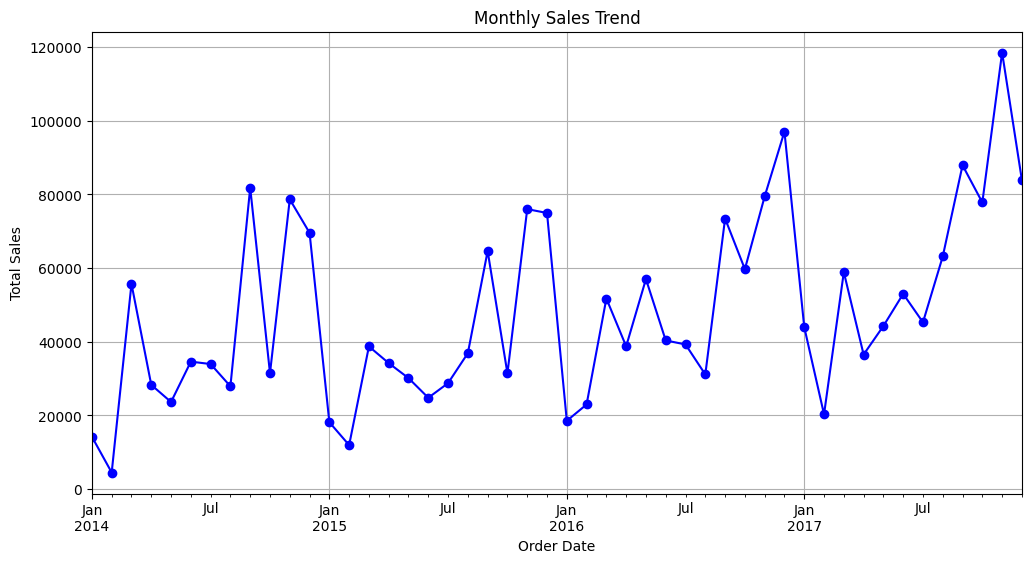

In [ ]:
# Ensure Order Date is datetime (you already started this!)
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Group by Month and Year
monthly_sales = df.resample('ME', on='Order Date')['Sales'].sum()

# Plotting the trend
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', marker='o', color='b')
plt.title('Monthly Sales Trend')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

"The dataset reveals a consistent upward trajectory over the 4-year period. Total annual sales grew from $484k in 2014 to over $733k in 2017, representing an approximate 51% total growth. This suggests a healthy, scaling business model rather than a one-time peak." Certain months consistently show higher sales, suggesting seasonal demand patterns.

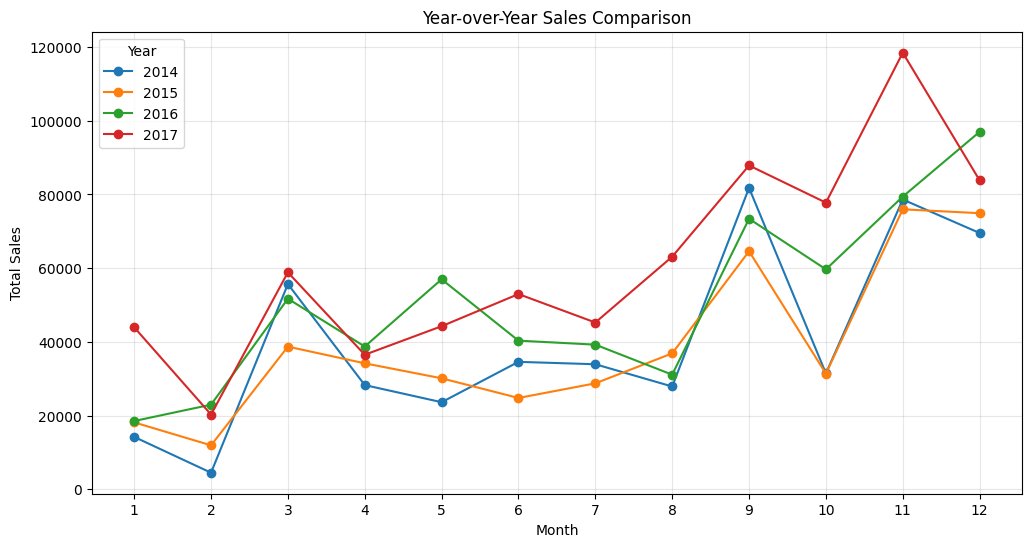

In [ ]:
# Extract Year and Month into new columns
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month

# Create a Pivot Table (Months vs Years)
pivot_table = df.pivot_table(values='Sales', index='Month', columns='Year', aggfunc='sum')

# Plotting the comparison
pivot_table.plot(figsize=(12,6), marker='o')
plt.title('Year-over-Year Sales Comparison')
plt.xticks(range(1,13)) # Ensure all months 1-12 show up
plt.ylabel('Total Sales')
plt.grid(alpha=0.3)
plt.show()

Year-over-year comparison shows that sales generally increase across months, indicating positive business growth

In [ ]:
df.groupby('Segment')['Profit'].sum().sort_values(ascending=False)


,Profit
Segment,
Consumer,134119.2092
Corporate,91979.1340
Home Office,60298.6785


Among all segments, Consumer contributes the highest total profit, followed by Corporate and Home Office.